In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

ROOT_DIR = "~/Documents/Personal Projects/mlops-zoomcamp-hw"

In [2]:
df = pd.read_parquet(f"{ROOT_DIR}/data/fhv_tripdata_2021-01.parquet")
df


dispatching_base_num     pickup_datetime    dropOff_datetime  \
0                     B00009 2021-01-01 00:27:00 2021-01-01 00:44:00   
1                     B00009 2021-01-01 00:50:00 2021-01-01 01:07:00   
2                     B00013 2021-01-01 00:01:00 2021-01-01 01:51:00   
3                     B00037 2021-01-01 00:13:09 2021-01-01 00:21:26   
4                     B00037 2021-01-01 00:38:31 2021-01-01 00:53:44   
...                      ...                 ...                 ...   
1154107               B03266 2021-01-31 23:43:03 2021-01-31 23:51:48   
1154108               B03284 2021-01-31 23:50:27 2021-02-01 00:48:03   
1154109      B03285          2021-01-31 23:13:46 2021-01-31 23:29:58   
1154110      B03285          2021-01-31 23:58:03 2021-02-01 00:17:29   
1154111               B03321 2021-01-31 23:39:00 2021-02-01 00:15:00   

         PUlocationID  DOlocationID SR_Flag Affiliated_base_number  
0                 NaN           NaN    None                 B00009  
1                 NaN           NaN    None                 B00009  
2                 NaN           NaN    None                 B00013  
3                 NaN          72.0    None                 B00037  
4                 NaN          61.0    None                 B00037  
...               ...           ...     ...                    ...  
1154107           7.0           7.0    None                 B03266  
1154108          44.0          91.0    None                         
1154109         171.0         171.0    None        B03285           
1154110          15.0          15.0    None        B03285           
1154111           NaN           NaN    None                 B03321  

[1154112 rows x 7 columns]

In [3]:
# How many records are there?
print(f"Q1. There are {df.shape[0]} records.")

Q1. There are 1154112 records.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


In [5]:
# df.SR_Flag.unique()
# df = df.drop("SR_Flag", axis=1)
# df = df.drop("Affiliated_base_number", axis=1)

In [6]:
df["duration"] = df["dropOff_datetime"] - df["pickup_datetime"]
df.head()

dispatching_base_num     pickup_datetime    dropOff_datetime  PUlocationID  \
0               B00009 2021-01-01 00:27:00 2021-01-01 00:44:00           NaN   
1               B00009 2021-01-01 00:50:00 2021-01-01 01:07:00           NaN   
2               B00013 2021-01-01 00:01:00 2021-01-01 01:51:00           NaN   
3               B00037 2021-01-01 00:13:09 2021-01-01 00:21:26           NaN   
4               B00037 2021-01-01 00:38:31 2021-01-01 00:53:44           NaN   

   DOlocationID SR_Flag Affiliated_base_number        duration  
0           NaN    None                 B00009 0 days 00:17:00  
1           NaN    None                 B00009 0 days 00:17:00  
2           NaN    None                 B00013 0 days 01:50:00  
3          72.0    None                 B00037 0 days 00:08:17  
4          61.0    None                 B00037 0 days 00:15:13

In [7]:
# Convert duration from timedelta64[ns] to float64 (in minutes)
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df.head()

dispatching_base_num     pickup_datetime    dropOff_datetime  PUlocationID  \
0               B00009 2021-01-01 00:27:00 2021-01-01 00:44:00           NaN   
1               B00009 2021-01-01 00:50:00 2021-01-01 01:07:00           NaN   
2               B00013 2021-01-01 00:01:00 2021-01-01 01:51:00           NaN   
3               B00037 2021-01-01 00:13:09 2021-01-01 00:21:26           NaN   
4               B00037 2021-01-01 00:38:31 2021-01-01 00:53:44           NaN   

   DOlocationID SR_Flag Affiliated_base_number    duration  
0           NaN    None                 B00009   17.000000  
1           NaN    None                 B00009   17.000000  
2           NaN    None                 B00013  110.000000  
3          72.0    None                 B00037    8.283333  
4          61.0    None                 B00037   15.216667

In [8]:
mean_duration = df["duration"].mean()
print(f"Q2. The average duration is {mean_duration} minutes.")

Q2. The average duration is 19.167224093791006 minutes.


<AxesSubplot:xlabel='duration', ylabel='Density'>

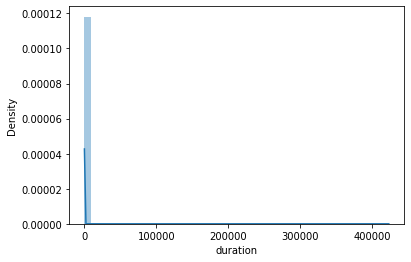

In [9]:
# Check distribution
sns.distplot(df["duration"])

In [10]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
50%      1.340000e+01
95%      4.725000e+01
98%      6.613333e+01
99%      9.030000e+01
max      4.233710e+05
Name: duration, dtype: float64

In [11]:
# filter_condition = (df["duration"] >= 1) & (df["duration"] <= 60)
# df_dropped = df[filter_condition]
df_dropped = df.loc[df.duration >= 1].loc[df.duration <= 60]
print(f"Number of dropped outliers: {df.shape[0] - df_dropped.shape[0]}")

Number of dropped outliers: 44286


In [12]:
df = df_dropped
df["PUlocationID"] = df["PUlocationID"].fillna(-1)
df["DOlocationID"] = df["DOlocationID"].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            1109826 non-null  float64       
 4   DOlocationID            1109826 non-null  float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   duration                1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


In [13]:
# Fraction of missing values for the pickup location ID
missing_values = df[df["PUlocationID"] == -1.0].shape[0]
print(f"Q3. Fraction of records with missing values for pickup location ID: {missing_values/df.shape[0]}")

Q3. Fraction of records with missing values for pickup location ID: 0.8352732770722617


<AxesSubplot:xlabel='duration', ylabel='Density'>

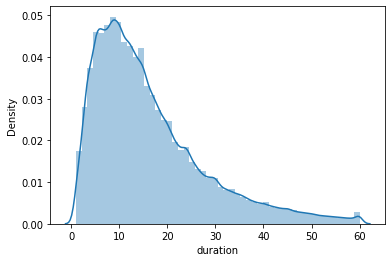

In [14]:
# Making sure the data distribution is fair
sns.distplot(df["duration"])

In [15]:
# df.duration.describe()
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    1.109826e+06
mean     1.624725e+01
std      1.155150e+01
min      1.000000e+00
50%      1.323333e+01
95%      4.070000e+01
98%      4.936667e+01
99%      5.423333e+01
max      6.000000e+01
Name: duration, dtype: float64

In [16]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
duration                         float64
dtype: object

In [17]:
# categorical = ["SR_Flag", "PUlocationID", "DOlocationID"]
categorical = ["PUlocationID", "DOlocationID"]
numerical = []
df[categorical] = df[categorical].astype(str)

In [18]:
df[categorical].dtypes

PUlocationID    object
DOlocationID    object
dtype: object

In [19]:
train_dicts = df[categorical].to_dict(orient='records')
train_dicts[0]

{'PUlocationID': '-1.0', 'DOlocationID': '-1.0'}

In [20]:
dic_vec = DictVectorizer()
X_train = dic_vec.fit_transform(train_dicts)
print(f"Q4. Dimensionality of feature matrix: {len(dic_vec.feature_names_)}")
# print(f"Q4. Dimensionality of feature matrix: {X_train.shape[1]}")

Q4. Dimensionality of feature matrix: 525


In [21]:
print(f"X_train shape: {X_train.shape}")

X_train shape: (1109826, 525)


In [22]:
y_train = df["duration"].values
print(f"y_train shape: {y_train.shape}")

y_train shape: (1109826,)


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print(f"Q5. RMSE on train data: {mean_squared_error(y_train, y_pred, squared=False)} minutes.")

Q5. RMSE on train data: 10.528519425310185 minutes.


Text(0.5, 1.0, 'Prediction vs Truth for Training Data (Jan Data)')

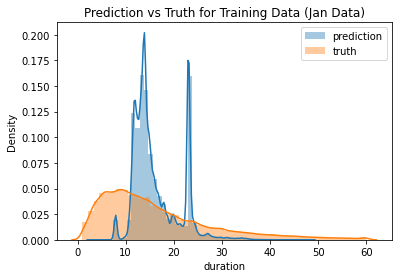

In [24]:
# Results visualization
sns.distplot(y_pred, label="prediction")
sns.distplot(y_train, label="truth")
plt.legend()
plt.xlabel("duration")
plt.title("Prediction vs Truth for Training Data (Jan Data)")

In [25]:
def preprocess_data(parquet_name):
    
        df = pd.read_parquet(f"{ROOT_DIR}/data/{parquet_name}")
        df["duration"] = df["dropOff_datetime"] - df["pickup_datetime"]

        # Convert duration from timedelta64[ns] to float64 (in minutes)
        df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

        # Filter results to obtain only data with 1 <= duration <= 60
        df = df.loc[df.duration >= 1].loc[df.duration <= 60]

        # Equate NaNs with "-1"
        df["PUlocationID"] = df["PUlocationID"].fillna(-1)
        df["DOlocationID"] = df["DOlocationID"].fillna(-1)

        return df

In [26]:
df_feb = preprocess_data("fhv_tripdata_2021-02.parquet")
df_feb[categorical] = df_feb[categorical].astype(str)
val_dicts = df_feb[categorical].to_dict(orient='records')
X_val = dic_vec.transform(val_dicts)
y_val = df_feb["duration"].values
print(f"X_val shape: {X_val.shape}")

X_val shape: (990113, 525)


In [27]:
print(f"y_val shape: {y_val.shape}")

y_val shape: (990113,)


In [28]:
y_pred_val = lr.predict(X_val)
print(f"Q6. RMSE on validation data (Feb data): {mean_squared_error(y_val, y_pred_val, squared=False)} minutes.")

Q6. RMSE on validation data (Feb data): 11.014285828610237 minutes.


Text(0.5, 1.0, 'Prediction vs Truth for Validation Data (Feb Data)')

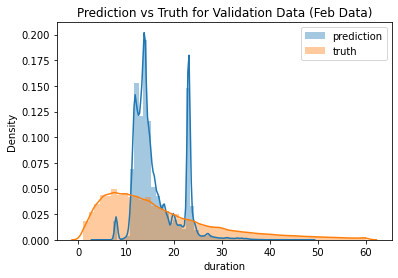

In [29]:
# Results visualization
sns.distplot(y_pred_val, label="prediction")
sns.distplot(y_val, label="truth")
plt.legend()
plt.xlabel("duration")
plt.title("Prediction vs Truth for Validation Data (Feb Data)")

In [30]:
with open('models/lin-reg.bin', 'wb') as f_out:
    pickle.dump((dic_vec, lr), f_out)

print("DONE !")

DONE !
